<a href="https://colab.research.google.com/github/Vputri/Rekayasa-Komputasi/blob/main/Rekayasan_Perangkat_Lunak_Tugas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIRECT METHOD

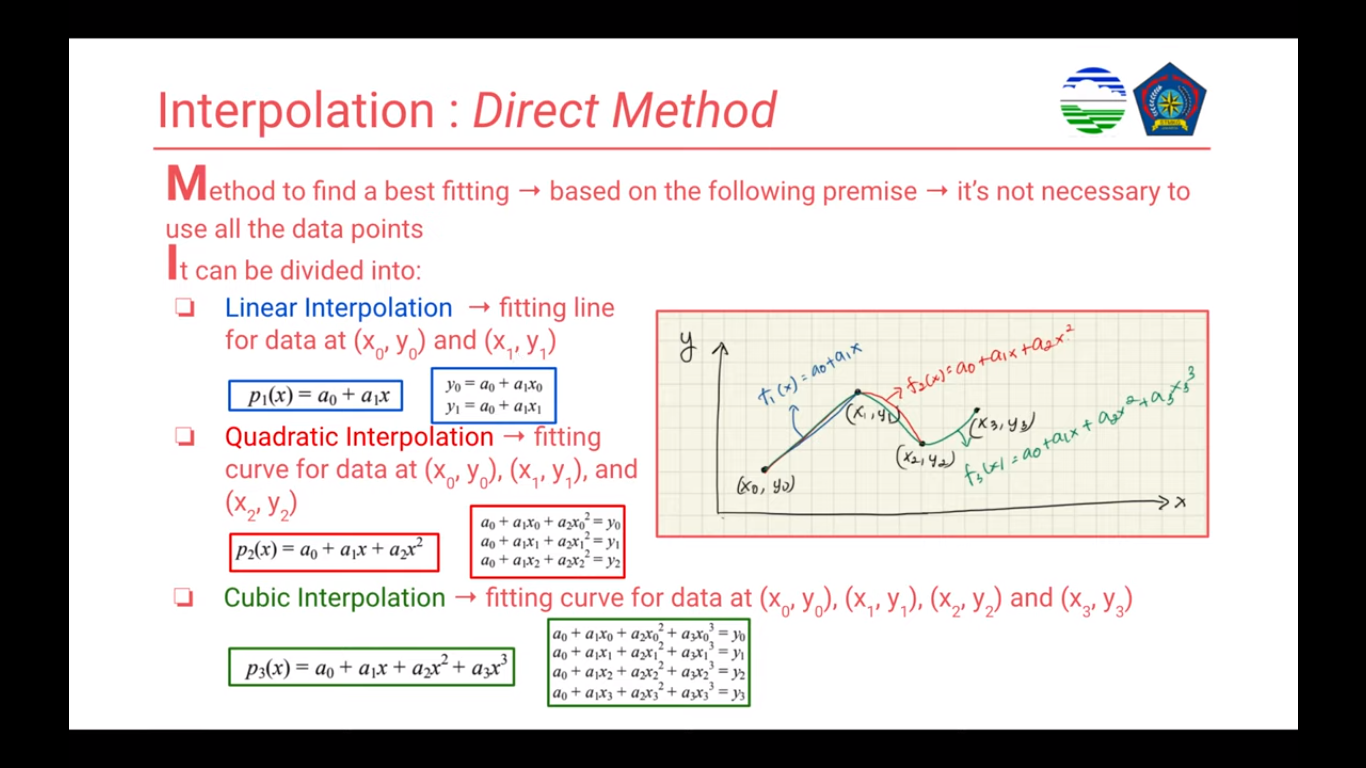

In [ ]:
def terdekat(t, vt, tcari, jml):
    tt = t[:]
    selindex = []
    closestvt = []
    for i in range(jml):
        daftar = []
        for j in range(len(tt)):
            daftar.append(abs(tt[j]-tcari))
        n = daftar.index(min(daftar))
        selindex.append(tt[n])
        tt.remove(tt[n])
    selindex.sort()
    for k in selindex : closestvt.append(vt[t.index(k)])
    return[selindex, closestvt]

In [ ]:
t = [0, 10, 15, 20, 22.5, 30]
vt = [0, 227.04, 362.78, 517.35, 602.97, 901.67]
tcari = 16
points = [2, 3, 4, 5]
vtcari0 = 0

In [ ]:
import numpy
matrixnya = numpy.zeros((len(t), len(t)+1))
for i in range(len(t)):
    matrixnya[i, len(t)] = vt[i]
    for j in range(len(t)):
        matrixnya[i,j] = t[i]**j

In [ ]:
def GaussJordan(A):
    n = len(A)
    x = numpy.zeros(n)
    for k in range(n):
        pivot = A[k][k]
        A[k] = A[k]/pivot
        for i in range(n):
            if i == k: continue
            factor = A[i][k]
            for j in range(k, n+1):
                A[i][j]-factor*A[k][j]
    x = A[:,n]
    return(x)

In [ ]:
def interpdirect(t, vt, tcari):
    matrixnya = numpy.zeros((len(t), len(t)+1))
    for i in range(len(t)):
        matrixnya[i, len(t)] = vt[i]
        for j in range(len(t)):
            matrixnya[i,j]=t[i]**j
    a= GaussJordan(matrixnya)
    vtcari = 0
    for i in range(len(a)):
        vtcari += a[i]*tcari**i
    return[a, vtcari]

In [ ]:
for i in points:
    [tx, vtx] = terdekat(t, vt, tcari, i)
    [a, vtcari] = interpdirect(tx, vtx, tcari)
    print("Orde ", i-1, " Nilai Kecepatan jatuh pada t ke ", tcari, " = ", "%.2f"%vtcari)
    if vtcari0 == 0:
      print("Error = -")
    else:
      print("Error = ", "%.5f"%abs((vtcari-vtcari0)/vtcari*100), "%")
    vtcari0 = vtcari

Orde  1  Nilai Kecepatan jatuh pada t ke  16  =  776.66
Error = -
Orde  2  Nilai Kecepatan jatuh pada t ke  16  =  945.11
Error =  17.82326 %
Orde  3  Nilai Kecepatan jatuh pada t ke  16  =  1161.93
Error =  18.66065 %
Orde  4  Nilai Kecepatan jatuh pada t ke  16  =  1234.89
Error =  5.90766 %


In [ ]:
tcari = 16
vtcari = 0
for i in range(len(a)):
    vtcari += a[i] * tcari ** i
print("Orde 3. Nilai v(16) adalah : ", vtcari)

Orde 3. Nilai v(16) adalah :  1234.886601218107
